In [1]:
using Arpack
using LinearAlgebra
using LaTeXStrings
using Revise
using PyPlot
using MeshGrid
includet("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
includet("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")
includet("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/lambda_funcs.jl")

# Berry Curvature

In [2]:
function grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)
    num_vertices = 4

    mBZ_count = num_mBZ(shells)
    shell_parts = sgn_parts(shells)
    partitions = sgn_parts(shells - 1)
    part_1s = sgn_parts(1)
    dict = part_dict(shells)

    ham = zeros(ComplexF64, mBZ_count, mBZ_count)
    spinors = Array{ComplexF64}(undef, num_vertices, mBZ_count, 2)
    grounds = Array{ComplexF64}(undef, num_vertices, mBZ_count)
    plaq_area = area(spacing * sqrt(2), num_vertices)
    # plaq_area = 1

    g1 = kappa * sqrt(3) * [-sqrt(3)/2, 1/2]
    g2 = kappa * sqrt(3) * [0, 1]

    gi = zeros(2)
    gj = zeros(2)

    berry_list = Array{Float64}(undef, size(grid, 1))

    for i in 1:size(grid, 1)
        berry_list[i] = lambda_mBZ_bc!(g1, g2, num_vertices, plaq_area, shell_parts, partitions, part_1s, dict, ham, spinors, grounds, 
        grid[i, :], lambda, rs, kappa, V, shells, index, spacing)
    end
    return berry_list
end

grid_bc (generic function with 1 method)

In [3]:
lambda = 1
rs = 1
kappa = 1
V = [[1, 0] [0, 10^(-8)]]
shells = 5
index = 1
spacing = 10^(-4)
grid = reshape(kappa * [cos(0*pi/3), sin(0*pi/3)], (1, 2))
grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)

1-element Vector{Float64}:
 -1.5707554315902066e8

In [4]:
lambda = 1
rs = 1
kappa = 1
V = 100 * [[0, 0] [0, 1]]
shells = 10
index = 1
spacing = 10^(-3)
grid = reshape(kappa * [cos(0*pi/3), sin(0*pi/3)], (1, 2))
grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)

1-element Vector{Float64}:
 -1.570785598483043e6

In [5]:
lambda = 0.96
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
spacing = 10^(-3)
grid = reshape(kappa * [cos(0*pi/3), sin(0*pi/3)], (1, 2))
grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)

1-element Vector{Float64}:
 4643.141932444622

# Convergence of Berry curvature

In [3]:
function spacing_conv(k, lambda, rs, kappa, V, shells, index)
    exp_list = range(1, 12, 10^2)
    berry_list = Array{Float64}(undef, length(exp_list))
    point = reshape(k, (1, 2))
    for j in 1:length(exp_list)
        spacing = 10^(-exp_list[j])
        berry_list[j] = (grid_bc(point, lambda, rs, kappa, V, shells, index, spacing)[1])
    end
    figure()
    xlabel(L"-\log(\text{spacing})")
    ylabel(L"\Omega(k_0)")
    title(L"\Omega(k_0) \text{ vs } -\log(\text{spacing})")
    plot(exp_list, berry_list)
    display(gcf())
end

spacing_conv (generic function with 1 method)

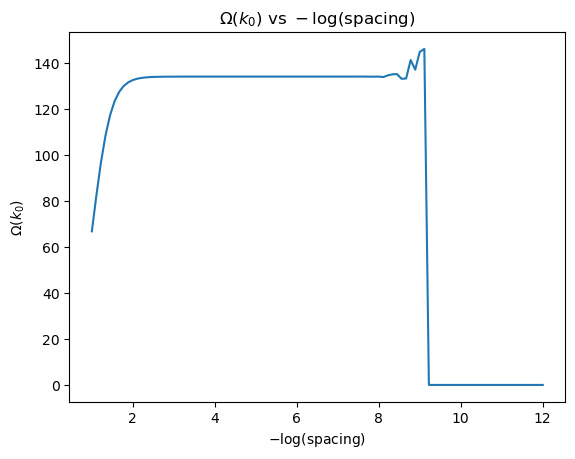

In [7]:
lambda = 1
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
k = kappa * [1, 0]
spacing_conv(k, lambda, rs, kappa, V, shells, index)

In [4]:
function shell_conv(k, lambda, rs, kappa, V, spacing, index)
    shell_list = 1:20
    berry_list = Array{Float64}(undef, length(shell_list))
    point = reshape(k, (1, 2))
    for j in 1:length(shell_list)
        shells = shell_list[j]
        berry_list[j] = (grid_bc(point, lambda, rs, kappa, V, shells, index, spacing)[1])
    end
    figure()
    xlabel(L"\text{shells}")
    ylabel(L"\Omega(k_0)")
    title(L"\Omega(k_0) \text{ vs } \text{shells}")
    plot(shell_list, berry_list)
    display(gcf())
end

shell_conv (generic function with 1 method)

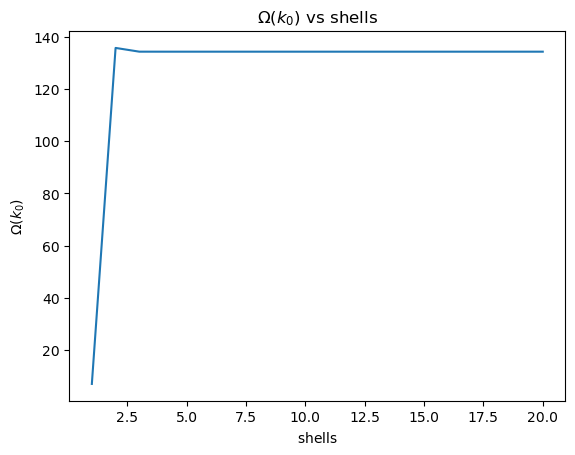

In [9]:
lambda = 1
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
spacing = 10^(-4)
index = 1
k = kappa * [1, 0]
shell_conv(k, lambda, rs, kappa, V, spacing, index)

# Berry curvature plots

In [3]:
function plot_bc(lambda, vF, kappa, V, shells, index, spacing, alpha)
    n_pts = 10^2
    
    # shift = 0.1
    # kx_list = range(kappa - shift, kappa + shift, n_pts)
    # ky_list = shift * range(-1, 1, n_pts)
    # grid = mesh_grid(kx_list, ky_list, Float64)
    k_list = range(-4, 4, n_pts)
    # grid = mesh_grid(k_list, k_list, Float64)
    delta = lambda_delta(kappa, lambda, V[1, 1], V[2, 2])
    # delta = exp(-im * 2 * pi/3)
    # delta = exp(-im * 2 * pi/3)
    #alpha = lambda_alpha(kappa, lambda, V[1, 1], V[2, 2])
    #vF = -2 * real(exp(im * 2 * pi/3) * alpha)
    # bc_list = Array{Float64}(undef, n_pts, 2)
    # eg_list = Array{Float64}(undef, n_pts, 2)

    # for j in 1:length(k_list)
    #     grid = reshape([k_list[j], 0], (1, 2))
    #     # bc_list[j, 1] = lambda_patch_bc(grid, spacing, lambda, kappa, vF, delta, alpha, 1)[1]
    #     # bc_list[j, 2] = lambda_patch_bc(grid, spacing, lambda, kappa, vF, delta, alpha, 2)[1]
    #     bc_list[j, 1] = bc_no_spinors(grid, spacing, vF, delta, alpha, 1)[1]
    #     bc_list[j, 2] = bc_no_spinors(grid, spacing, vF, delta, alpha, 2)[1]

    #     k = [k_list[j], 0]
    #     ham = H_k_v2(k, vF) + H_mft_v2(k, delta, alpha)
    #     vals = eigvals(Hermitian(ham))
    #     eg_list[j, 1] = vals[1]
    #     eg_list[j, 2] = vals[2]
    # end

    # k_list = range(-kappa, kappa, n_pts)
    grid = mesh_grid(k_list, k_list, Float64)


    # bc_list = grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)
    # bc_list = log10.(abs.(bc_no_spinors(grid, spacing, vF, delta, alpha, index)))
    bc_list = bc_no_spinors(grid, spacing, vF, delta, alpha, index)
    

    # bc_list = log10.(abs.(lambda_patch_bc(grid, spacing, lambda, kappa, vF, delta, alpha)))

    grid_new = reshape(grid, (n_pts, n_pts, 2))
    bc_list_new = reshape(bc_list, (n_pts, n_pts))

    bc_min = minimum(bc_list_new)
    bc_max = maximum(bc_list_new)
    bc_abs = maximum(abs.([bc_min, bc_max]))

    figure()
    
    xlabel(L"k_x")
    ylabel(L"\Omega")
    title(L"\Omega(k_x, k_y) \text{ vs } (k_x, k_y)")
    pcolormesh(grid_new[:, :, 1], grid_new[:, :, 2], bc_list_new, cmap="RdBu", vmin = -bc_abs, vmax = bc_abs)
    colorbar()
    # plot(k_list, bc_list)
    display(gcf())
end

plot_bc (generic function with 1 method)

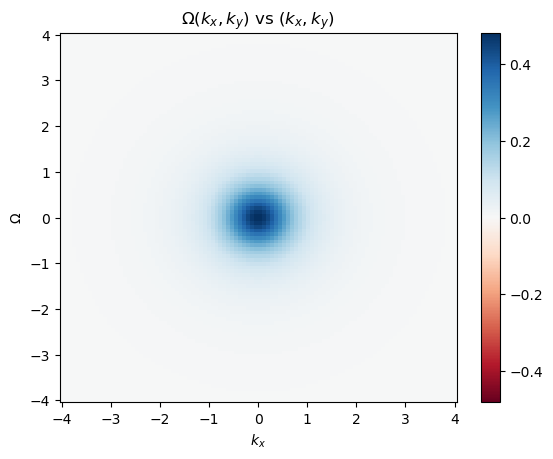

In [361]:
lambda = 2
kappa = 1
V = [[-1, 0] [0, -1]]
alpha = exp(im * pi/3 + im * 0.5)
vF = -2 * real(exp(im * 2 * pi/3) * alpha)
shells = 5
index = 1
spacing = 10^(-5)
plot_bc(lambda, vF, kappa, V, shells, index, spacing, alpha)

In [4]:
function plotter_bc(lambda, vF, kappa, V, index, spacing, delta, alpha)
    n_pts = 10^2
    k_list = range(-1, 1, n_pts)
   #  delta = lambda_delta(kappa, lambda, V[1, 1], V[2, 2]) + 0.002

  
    grid = mesh_grid(k_list, k_list, Float64)

    bc_list = bc_no_spinors(grid, spacing, vF, delta, alpha, index)
    
    grid_new = reshape(grid, (n_pts, n_pts, 2))
    bc_list_new = reshape(bc_list, (n_pts, n_pts)) / (pi)

    bc_min = minimum(bc_list_new)
    bc_max = maximum(bc_list_new)
    bc_abs = maximum(abs.([bc_min, bc_max]))

    fig, axs = plt.subplots(1,1,figsize=(5, 6))
    
    axs.set_xlabel(L"q_x", fontsize = 16)
    axs.set_ylabel(L"q_y", fontsize = 16, rotation=0, labelpad=10)
    xticks = [0]
    xlabels = [L"0"]
    #axs.set_xticks(xticks, labels=xlabels)
    yticks = [0]
    ylabels = [L"0"]
    #axs.set_yticks(yticks, labels=ylabels)
    #axs.yaxis.set_label_coords(-0.1, 0.47)
    # berry = axs.pcolormesh(grid_new[:, :, 1], grid_new[:, :, 2], bc_list_new, cmap="RdBu", vmin = -bc_abs, vmax = bc_abs)
    berry = axs.pcolormesh(grid_new[:, :, 1], grid_new[:, :, 2], bc_list_new, cmap="RdBu")
    cbar = fig.colorbar(berry, orientation="horizontal", location="top")
    # cbar.set_ticks([-0.1, -0.05, 0, 0.05, 0.1])
    # cbar.set_ticklabels([L"-\pi / 5", L"-\pi/10", L"0", L"\pi/10", L"\pi /5"])
    fig.tight_layout()
    fig
end

plotter_bc (generic function with 1 method)

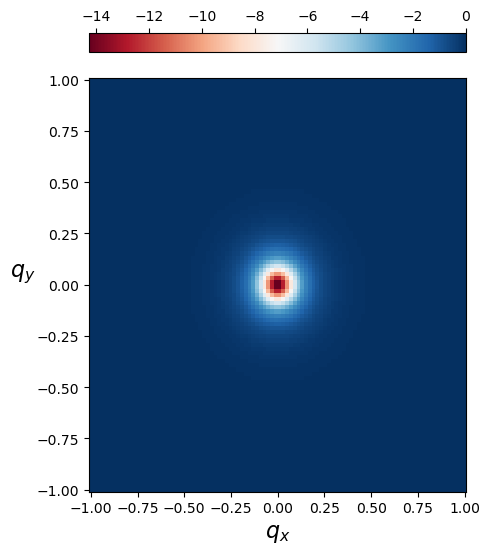

In [610]:
lambda = 1
kappa = 1
V = [[-1, 0] [0, -1]]
#alpha = (lambda_alpha(kappa, lambda, V[1, 1], V[2, 2]))
delta = exp(im *2*pi/3) + 0.1
alpha = exp(-2*im*pi/3)
vF = -2 * real(exp(im * 2 * pi/3) * alpha) + 0.1
index = 1
spacing = 10^(-6)
plotter_bc(lambda, vF, kappa, V, index, spacing, delta, alpha)

## Prepare 3-patch Berry curvature plots

In [5]:
function A1_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A1 = (epsilon - v5) * (epsilon - v3) - abs2(f1)
    
    return A1 / sqrt(nmz)
end
function A3_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A3 = conj(f3) * (epsilon - v3) + f1 * f5
    
    return A3 / sqrt(nmz)
end
function A5_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A5 = f5 * (epsilon - v5) + conj(f1) * conj(f3)
    
    return A5 / sqrt(nmz)
end
function d_A1(delta, alpha, k, index, vF, dmu)
    A1_0 = A1_comp(delta, alpha, k, index, vF)
    A1_x = A1_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A1_y = A1_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A1 = (A1_x - A1_0)/dmu
    dy_A1 = (A1_y - A1_0)/dmu

    return [dx_A1, dy_A1]
end
function d_A3(delta, alpha, k, index, vF, dmu)
    A3_0 = A3_comp(delta, alpha, k, index, vF)
    A3_x = A3_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A3_y = A3_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A3 = (A3_x - A3_0)/dmu
    dy_A3 = (A3_y - A3_0)/dmu

    return [dx_A3, dy_A3]
end
function d_A5(delta, alpha, k, index, vF, dmu)
    A5_0 = A5_comp(delta, alpha, k, index, vF)
    A5_x = A5_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A5_y = A5_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A5 = (A5_x - A5_0)/dmu
    dy_A5 = (A5_y - A5_0)/dmu

    return [dx_A5, dy_A5]
end
function d_lambda_spinor(lambda, k, dmu)
    chi_0 = lambda_spinor(lambda, k)
    chi_x = lambda_spinor(lambda, k .+ [dmu, 0])
    chi_y = lambda_spinor(lambda, k .+ [0, dmu])
    dx_chi = (chi_x - chi_0)/dmu
    dy_chi = (chi_y - chi_0)/dmu
    return [dx_chi, dy_chi]
end

d_lambda_spinor (generic function with 1 method)

In [6]:
function cross_term(lambda, kappa, V, vF, q, index)
    kappa1 = [kappa, 0]
    kappa3 = kappa * [cos(2*pi/3), sin(2*pi/3)]
    kappa5 = kappa * [cos(4*pi/3), sin(4*pi/3)]

    delta = lambda_delta(kappa, lambda, V[1, 1], V[2, 2])
    alpha = lambda_alpha(kappa, lambda, V[1, 1], V[2, 2])

    phi = wrap_angle(angle(delta))

    dmu = 10^(-7)

    ham = H_mft_v2(q, delta, alpha) + H_k_v2(q, vF)

    vec = gauge_fix(normalize(eigvecs(Hermitian(ham))[:, 1]))

    A1 = vec[1]
    grad_A1 = d_A1(delta, alpha/2, q, index, vF/2, dmu)

    A1_x = 2im * real(conj(A1) * grad_A1[1])
    A1_y = 2im * real(conj(A1) * grad_A1[2])

    A3 = vec[2]
    grad_A3 = d_A3(delta, alpha/2, q, index, vF/2, dmu)
    A3_x = 2im * real(conj(A3) * grad_A3[1])
    A3_y = 2im * real(conj(A3) * grad_A3[2])

    A5 = vec[3]
    grad_A5 = d_A5(delta, alpha/2, q, index, vF/2, dmu)
    A5_x = 2im * real(conj(A5) * grad_A5[1])
    A5_y = 2im * real(conj(A5) * grad_A5[2])

    chi1 = lambda_spinor(lambda, kappa1 .+ q)
    grad_chi1 = d_lambda_spinor(lambda, kappa1 .+ q, dmu)
    chi1_x = dot(chi1, grad_chi1[1])
    chi1_y = dot(chi1, grad_chi1[2])

    chi3 = lambda_spinor(lambda, kappa3 .+ q)
    grad_chi3 = d_lambda_spinor(lambda, kappa3 .+ q, dmu)
    chi3_x = dot(chi3, grad_chi3[1])
    chi3_y = dot(chi3, grad_chi3[2])

    chi5 = lambda_spinor(lambda, kappa5 .+ q)
    grad_chi5 = d_lambda_spinor(lambda, kappa5 .+ q, dmu)
    chi5_x = dot(chi5, grad_chi5[1])
    chi5_y = dot(chi5, grad_chi5[2])

    return real((A1_x * chi1_y - A1_y * chi1_x) + (A3_x * chi3_y - A3_y * chi3_x) + (A5_x * chi5_y - A5_y * chi5_x))
end
function pure_3_patch(lambda, kappa, V, vF, q, spacing, index)
    v1 = V[1, 1]
    v2 = V[2, 2]
    delta = lambda_delta(kappa, lambda, v1, v2)
    alpha = lambda_alpha(kappa, lambda, v1, v2)
    return bc_no_spinors(reshape(q, (1, 2)), spacing, vF, delta, alpha, index)[1]
end

pure_3_patch (generic function with 1 method)

In [7]:
function anal_patch_bc(q, lambda, vF, kappa, V, index, spacing)
    parent_contrib = lambda_parent(lambda, V[1, 1], V[2, 2], kappa, vF, q)
    cross_contrib = cross_term(lambda, kappa, V, vF, q, index)
    pure_3p = pure_3_patch(lambda, kappa, V, vF, q, spacing, index)
    return parent_contrib + cross_contrib + pure_3p
end

anal_patch_bc (generic function with 1 method)

In [8]:
function patch_plotter_bc(lambda, vF, kappa, V, index, spacing, delta, alpha)
    n_pts = 10^2
    k_list = range(-2, 2, n_pts)
    # delta = exp(-im * 2 * pi/3)
  
    grid = mesh_grid(k_list, k_list, Float64)

    # bc_list = bc_no_spinors(grid, spacing, vF, delta, alpha, index)
    bc_list = lambda_patch_bc(grid, spacing, lambda, kappa, vF, delta, alpha, index)
    # bc_list = Array{Float64}(undef, n_pts * n_pts)
    # for j in 1:n_pts*n_pts
    #     bc_list[j] = anal_patch_bc(grid[j, :], lambda, vF, kappa, V, index, spacing)
    # end
    
    grid_new = reshape(grid, (n_pts, n_pts, 2))
    bc_list_new = reshape(bc_list, (n_pts, n_pts)) / (pi)

    bc_min = minimum(bc_list_new)
    bc_max = maximum(bc_list_new)
    bc_abs = maximum(abs.([bc_min, bc_max]))

    fig, axs = plt.subplots(1,1,figsize=(5, 6))
    
    axs.set_xlabel(L"q_x", fontsize = 16)
    axs.set_ylabel(L"q_y", fontsize = 16, rotation=0, labelpad=10)
    xticks = [0]
    xlabels = [L"0"]
    axs.set_xticks(xticks, labels=xlabels)
    yticks = [0]
    ylabels = [L"0"]
    axs.set_yticks(yticks, labels=ylabels)
    axs.yaxis.set_label_coords(-0.1, 0.47)
    berry = axs.pcolormesh(grid_new[:, :, 1], grid_new[:, :, 2], bc_list_new, cmap="RdBu", vmin = -bc_abs, vmax = bc_abs)
    cbar = fig.colorbar(berry, orientation="horizontal", location="top")
    # cbar.set_ticks([-150, -75, 0, 75, 150])
    # cbar.set_ticklabels([L"-150 \pi", L"-75 \pi", L"0", L"75 \pi", L"150 \pi"])
    # cbar.set_ticks([-10, 0, 10])
    # cbar.set_ticklabels([L"-10 \pi", L"0", L"10 \pi"])

    # cbar.set_ticks([-60, 0, 60])
    # cbar.set_ticklabels([L"-60 \pi", L"0", L"60 \pi"])

    # cbar.set_ticks([-150, -50, 0, 50, 150])
    # cbar.set_ticklabels([L"-150 \pi", L"-50 \pi", L"0", L"50 \pi", L"150 \pi"])


    hex1 = hex_outline([-1, 0], kappa, 10^(-2))
    hex2 = hex_outline([-1, 0] + [3*kappa/2, kappa*sqrt(3)/2], kappa, 10^(-2))
    hex3 = hex_outline([-1, 0] + [3*kappa/2, -kappa*sqrt(3)/2], kappa, 10^(-2))

    trunc_hex1 = zeros(size(hex1))
    trunc_hex2 = zeros(size(hex2))
    trunc_hex3 = zeros(size(hex3))
    for j in 1:length(hex1[:, 1])
        if k_list[1] <= hex1[j, 1] &&  hex1[j, 1] <= k_list[n_pts]
            if k_list[1] <= hex1[j, 2] && hex1[j, 2] <= k_list[n_pts]
                trunc_hex1[j, : ] = hex1[j, :]
            end
        end
        if k_list[1] <= hex2[j, 1] && hex2[j, 1] <= k_list[n_pts]
            if k_list[1] <= hex2[j, 2] && hex2[j, 2] <= k_list[n_pts]
                trunc_hex2[j, : ] = hex2[j, :]
            end
        end
        if k_list[1] <= hex3[j, 1] && hex3[j, 1] <= k_list[n_pts]
            if k_list[1] <= hex3[j, 2] && hex3[j, 2] <= k_list[n_pts]
                trunc_hex3[j, : ] = hex3[j, :]
            end
        end
    end
    trunc_hex1 = reshape(trunc_hex1, (:, 2))
    trunc_hex2 = reshape(trunc_hex2, (:, 2))
    trunc_hex3 = reshape(trunc_hex3, (:, 2))

    axs.scatter(trunc_hex1[:, 1], trunc_hex1[:, 2], s = ones(length(trunc_hex1[:, 1])), alpha=0.4, c="k")
    axs.scatter(trunc_hex2[:, 1], trunc_hex2[:, 2], s = ones(length(trunc_hex2[:, 1])), alpha=0.4, c="k")
    axs.scatter(trunc_hex3[:, 1], trunc_hex3[:, 2], s = ones(length(trunc_hex3[:, 1])), alpha=0.4, c="k")
    # axs.scatter(hex1[:, 1], hex1[:, 2], s = ones(length(hex1[:, 1])), alpha=0.4, c="k")
    # axs.scatter(hex2[:, 1], hex2[:, 2], s = ones(length(hex2[:, 1])), alpha=0.4, c="k")
    # axs.scatter(hex3[:, 1], hex3[:, 2], s = ones(length(hex3[:, 1])), alpha=0.4, c="k")



    fig.tight_layout()
    fig
end

patch_plotter_bc (generic function with 1 method)

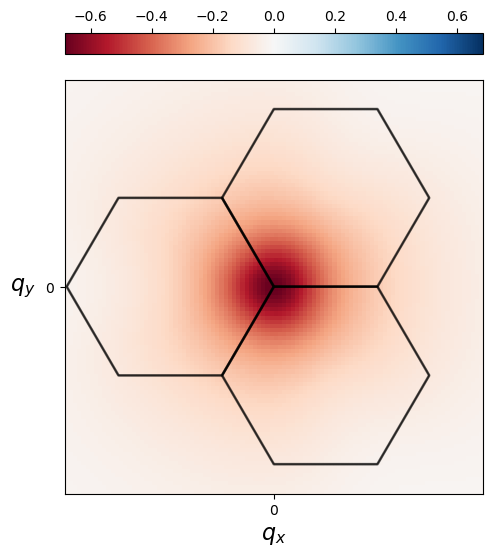

In [16]:
lambda = 0.8
kappa = 1
V = [[-1, 0] [0, -1]]
delta = lambda_delta(kappa, lambda, V[1, 1], V[2, 2])
alpha = lambda_alpha(kappa, lambda, V[1, 1], V[2, 2])

vF = 0.1
# vF = 12
index = 1
spacing = 10^(-6)
patch_plotter_bc(lambda, vF, kappa, V, index, spacing, delta, alpha)

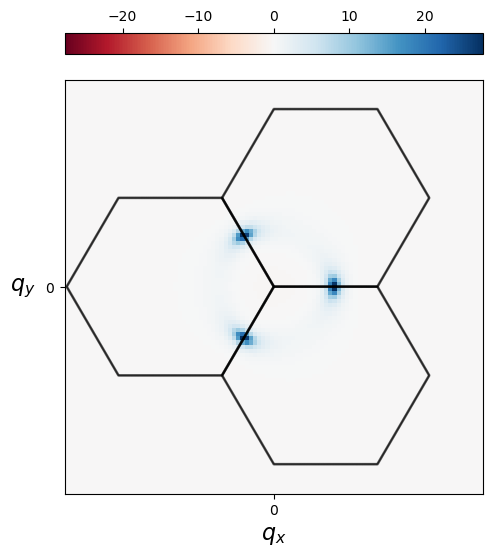

In [623]:
lambda = 0.7
kappa = 1
V = [[0.1, 0] [0, 1]]
delta = lambda_delta(kappa, lambda, V[1, 1], V[2, 2])
alpha = lambda_alpha(kappa, lambda, V[1, 1], V[2, 2])

vF = -2 * real(exp(-im * 2 * pi/3) * alpha) - 0.1
# vF = 12
index = 1
spacing = 10^(-6)
patch_plotter_bc(lambda, vF, kappa, V, index, spacing, delta, alpha)

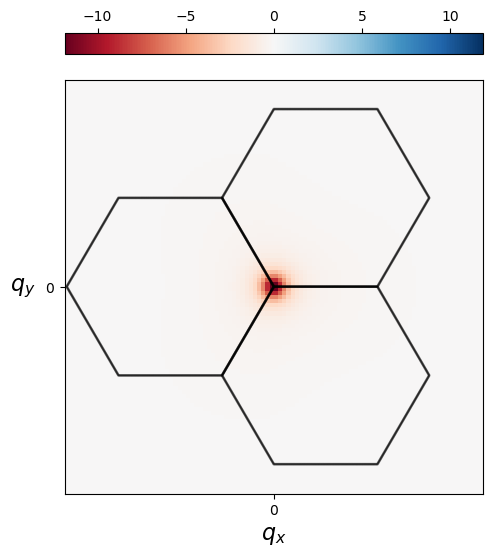

In [624]:
lambda = 0.92
kappa = 1
V = [[-1, 0] [0, -1]]
delta = lambda_delta(kappa, lambda, V[1, 1], V[2, 2])
alpha = lambda_alpha(kappa, lambda, V[1, 1], V[2, 2])

vF = -2 * real(exp(-im * 2 * pi/3) * alpha)
# vF = 12
index = 1
spacing = 10^(-6)
patch_plotter_bc(lambda, vF, kappa, V, index, spacing, delta, alpha)

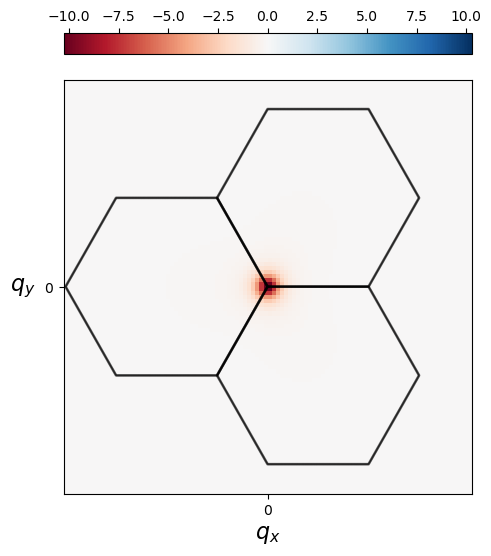

In [588]:
lambda = 0.7
kappa = 1
V = [[0.1, 0] [0, 1]]
delta = lambda_delta(kappa, lambda, V[1, 1], V[2, 2])
alpha = lambda_alpha(kappa, lambda, V[1, 1], V[2, 2])

vF = -2 * real(exp(im * 2 * pi/3) * alpha)
# vF = 12
index = 1
spacing = 10^(-6)
patch_plotter_bc(lambda, vF, kappa, V, index, spacing, delta, alpha)

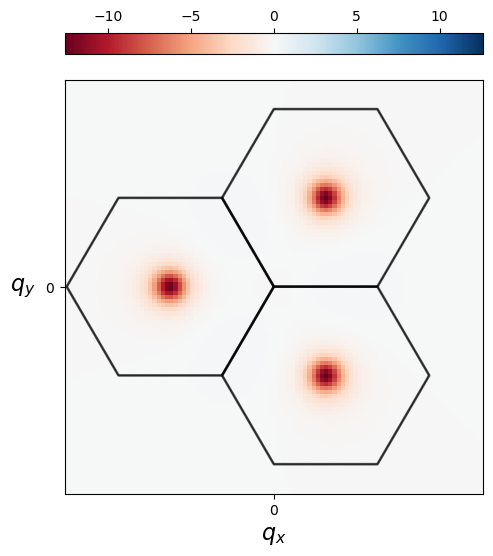

In [402]:
lambda = 5
kappa = 1
V = [[-1, 0] [0, -1]]
delta = lambda_delta(kappa, lambda, V[1, 1], V[2, 2])
alpha = lambda_alpha(kappa, lambda, V[1, 1], V[2, 2])
vF = -2 * real(exp(im * 2 * pi/3) * alpha)
# vF = 12
index = 1
spacing = 10^(-3)
patch_plotter_bc(lambda, vF, kappa, V, index, spacing, delta, alpha)

# Stuff

In [269]:
function plot_bc_ang(lambda, vF, kappa, V, shells, index, spacing, k_mag)
    n_pts = 10^2
    
    ang_list = range(-pi, pi, n_pts)
    
    # delta = lambda_delta(kappa, lambda, V[1, 1], V[2, 2])
    delta = exp(-im * 2 * pi/3)
    
    alpha = exp(im * pi/3) + 0.1
    a1 = -2 * real(exp(im * 2 * pi/3) * alpha)
    a2 = 1
    t_list = range(0., 0, 1)

    # vF = -2 * real(exp(im * 2 * pi/3) * alpha)
    figure()
    
    xlabel(L"\text{arg}(q)")
    ylabel(L"\Omega")
    title(L"\Omega \text{ vs } \text{arg}(q)")
    
    bc_list = Array{Float64}(undef, n_pts)
    for i in 1:length(t_list)
        vF = (1 - t_list[i]) * a1 + t_list[i] * a2
        for j in 1:n_pts
            grid = reshape(k_mag * [cos(ang_list[j]), sin(ang_list[j])], (1, 2))
            bc_list[j] = bc_no_spinors(grid, spacing, vF, delta, alpha, index)[1]
        end
        plot(ang_list, bc_list / maximum(bc_list), label = vF)
    end
    legend()
    display(gcf())
end

plot_bc_ang (generic function with 1 method)

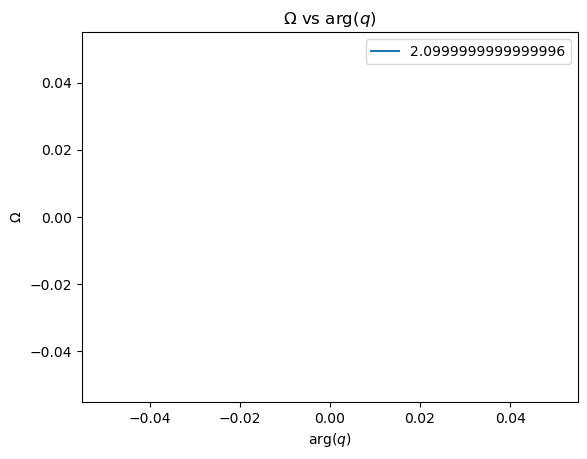

In [45]:
lambda = 1
kappa = 1
V = [[-1, 0] [0, -1]]
# vF = -2 * real(exp(im * 2 * pi/3) * lambda_alpha(kappa, lambda, V[1, 1], V[2, 2]))
vF = 1.5
shells = 5
index = 2
spacing = 10^(-8)
k_mag = 0.01
plot_bc_ang(lambda, vF, kappa, V, shells, index, spacing, k_mag)

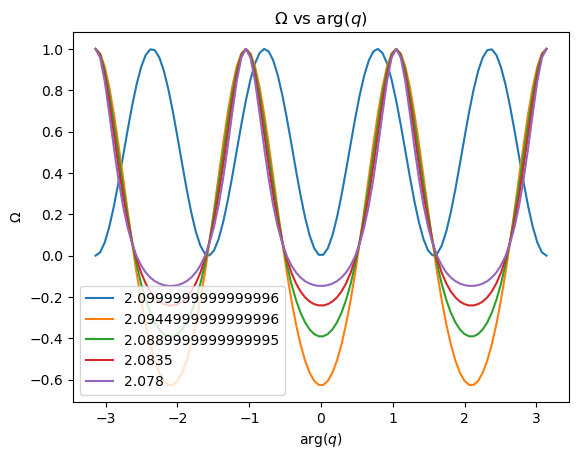

In [560]:
lambda = 1
kappa = 1
V = [[-1, 0] [0, -1]]
# vF = -2 * real(exp(im * 2 * pi/3) * lambda_alpha(kappa, lambda, V[1, 1], V[2, 2]))
vF = 1.5
shells = 5
index = 2
spacing = 10^(-4)
k_mag = 0.05
plot_bc_ang(lambda, vF, kappa, V, shells, index, spacing, k_mag)

In [36]:
function plot_bc_ang_v2(kappa, V, spacing, k_mag)
    n_pts = 10^2
    
    ang_list = range(-pi, pi, n_pts)

    delta = exp(-im * 2 * pi/3)
    
   
    figure()
    
    xlabel(L"\text{arg}(\alpha) / \pi")
    ylabel(L"\Omega")
    title(L"\Omega \text{ vs } \text{arg}(\alpha ) / \pi")
    bc_list = Array{Float64}(undef, n_pts, 3)
    for j in 1:n_pts
        alpha = 1 * exp(im * ang_list[j])
        vF = -2 * real(exp(im * 2 * pi/3) * alpha)
        grid = reshape(k_mag * [1, 1], (1, 2))
        bc_list[j, 1] = bc_no_spinors(grid, spacing, vF, delta, alpha, 1)[1]
        bc_list[j, 2] = bc_no_spinors(grid, spacing, vF, delta, alpha, 2)[1]
        bc_list[j, 3] = bc_no_spinors(grid, spacing, vF, delta, alpha, 3)[1]
    end
    plot(ang_list/pi, bc_list[:, 1], label = L"\Omega_-")
    plot(ang_list/pi, bc_list[:, 2], label = L"\Omega_0")
    plot(ang_list/pi, bc_list[:, 3], label = L"\Omega_+")
    legend()
    plot(1/3 * ones(n_pts), bc_list)
    plot(5/6 * ones(n_pts), bc_list)
    plot(-2/3 * ones(n_pts), bc_list)
    plot(-1/6 * ones(n_pts), bc_list)
    display(gcf())
end

plot_bc_ang_v2 (generic function with 1 method)

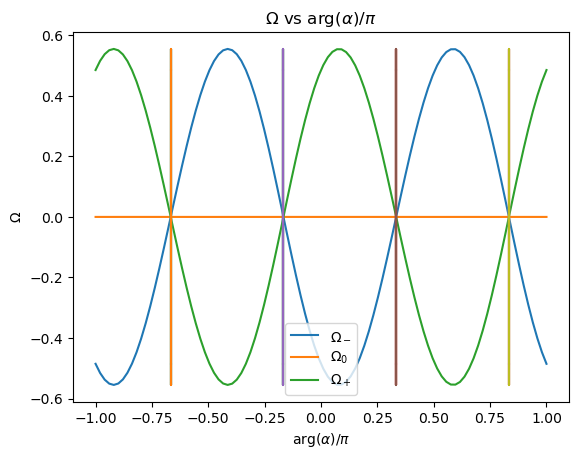

In [138]:
kappa = 1
V = [[-1, 0] [0, -1]]
spacing = 10^(-4)
k_mag = 0.1
plot_bc_ang_v2(kappa, V, spacing, k_mag)

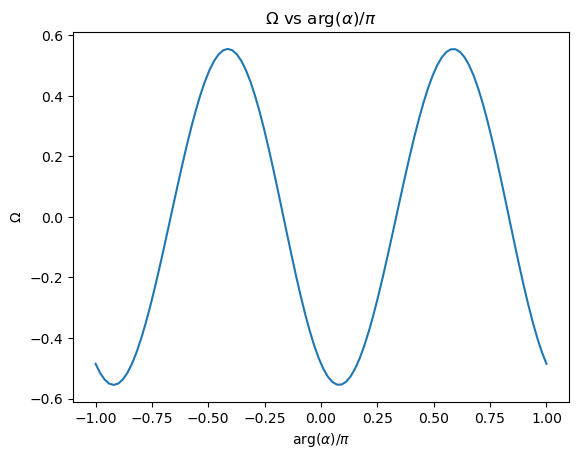

In [56]:
lambda = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
spacing = 10^(-4)
k_mag = 0.1
plot_bc_ang_v2(kappa, V, index, spacing, k_mag)

In [72]:
function plot_bc(lambda, rs, kappa, V, shells, index, spacing)
    n_pts = 10^2
    
    # shift = 0.1
    # kx_list = range(kappa - shift, kappa + shift, n_pts)
    # ky_list = shift * range(-1, 1, n_pts)
    # grid = mesh_grid(kx_list, ky_list, Float64)
    k_list = range(-0.01, 0.01, n_pts)
    # grid = mesh_grid(k_list, k_list, Float64)
    delta = lambda_delta(kappa, lambda, V[1, 1], V[2, 2])
    alpha = lambda_alpha(kappa, lambda, V[1, 1], V[2, 2])
    vF = -2 * real(exp(im * 2 * pi/3) * alpha)
    bc_list = Array{Float64}(undef, n_pts, 2)
    eg_list = Array{Float64}(undef, n_pts, 2)

    for j in 1:length(k_list)
        grid = reshape([k_list[j], 0], (1, 2))
        # bc_list[j, 1] = lambda_patch_bc(grid, spacing, lambda, kappa, vF, delta, alpha, 1)[1]
        # bc_list[j, 2] = lambda_patch_bc(grid, spacing, lambda, kappa, vF, delta, alpha, 2)[1]
        bc_list[j, 1] = bc_no_spinors(grid, spacing, vF, delta, alpha, 1)[1]
        bc_list[j, 2] = bc_no_spinors(grid, spacing, vF, delta, alpha, 2)[1]

        k = [k_list[j], 0]
        ham = H_k_v2(k, vF) + H_mft_v2(k, delta, alpha)
        vals = eigvals(Hermitian(ham))
        eg_list[j, 1] = vals[1]
        eg_list[j, 2] = vals[2]
    end

    # k_list = range(-kappa, kappa, n_pts)
    # grid = mesh_grid(k_list, k_list, Float64)


    # bc_list = grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)
    

    # bc_list = log10.(abs.(lambda_patch_bc(grid, spacing, lambda, kappa, vF, delta, alpha)))

    # grid_new = reshape(grid, (n_pts, n_pts, 2))
    # bc_list_new = reshape(bc_list, (n_pts, n_pts))

    # bc_min = minimum(bc_list_new)
    # bc_max = maximum(bc_list_new)
    # bc_abs = maximum(abs.([bc_min, bc_max]))

    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    axs[1, 1].plot(k_list, bc_list[:, 1])
    axs[1, 2].plot(k_list, bc_list[:, 2])
    axs[2, 1].plot(k_list, eg_list[:, 1], label = "1")
    axs[2, 1].plot(k_list, eg_list[:, 2], label = "2")
    axs[2, 1].legend()

    axs[2, 2].plot(k_list, eg_list[:, 2] - eg_list[:, 1])
    fig

    # xlabel(L"k_x")
    # ylabel(L"\Omega")
    # title(L"\Omega(k_x, k_y) \text{ vs } (k_x, k_y) \text{ for } \lambda = 1.2")
    # # pcolormesh(grid_new[:, :, 1], grid_new[:, :, 2], bc_list_new, cmap="RdBu", vmin = -bc_abs, vmax = bc_abs)
    # # colorbar()
    # plot(k_list, bc_list)
    # display(gcf())
end

plot_bc (generic function with 1 method)

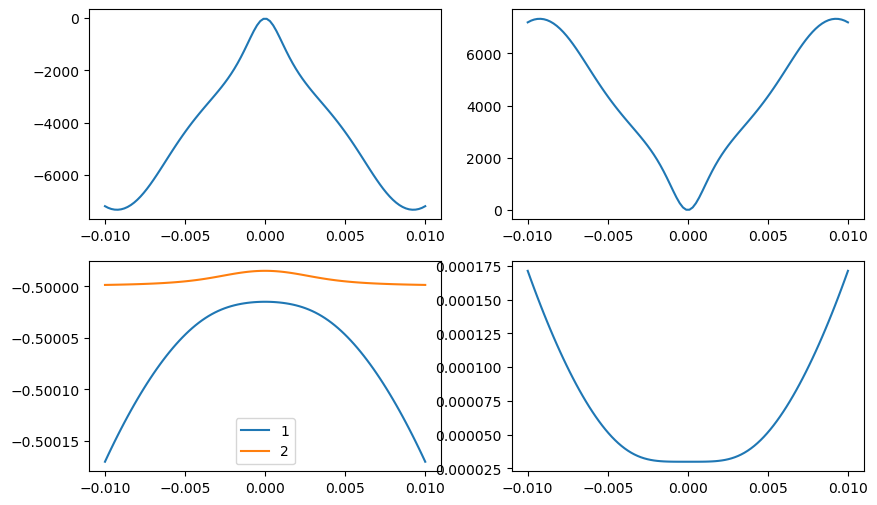

In [123]:
lambda = 1.00001
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
spacing = 10^(-2)
plot_bc(lambda, rs, kappa, V, shells, index, spacing)

In [105]:
function plot_conv(lambda, rs, kappa, V, shells, index)
    exp_list = range(4, 6, 10^2)
    bc_list = Array{Float64}(undef, length(exp_list))
    # delta = lambda_delta(1, 1.00001, -1, -1)
    delta = exp(-im * 2 * pi/3)
    # alpha = lambda_alpha(1, 1.00001, -1, -1)
    # vF = -2 * real(exp(im * 2 * pi/3) * alpha)
    alpha = 0.01 * exp(im*pi/4)
    vF = -2 * real(exp(im * 2 * pi/3) * alpha)
    for j in 1:length(exp_list)
        spacing = 10^(-exp_list[j])
        bc_list[j] = bc_no_spinors(reshape([0.5, 0.1], (1, 2)), spacing, vF, delta, alpha, 3)[1]
    end
    fig, axs = plt.subplots(1, 1, figsize=(10, 6))
    axs.plot(exp_list, bc_list)
    fig
end

plot_conv (generic function with 1 method)

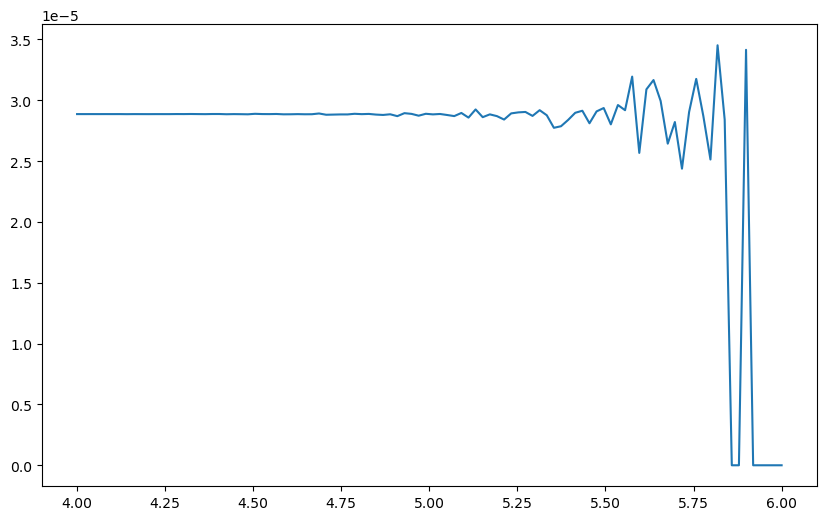

In [106]:
plot_conv(lambda, 1, kappa, V, shells, index)

In [88]:
delta = lambda_delta(1, 1, -1, -1)
alpha = lambda_alpha(1, 1, -1, -1)
vF = -2 * real(exp(im * 2 * pi/3) * alpha)
bc_no_spinors(reshape([0, 0], (1, 2)), 10^(-4), vF, delta, alpha, 1)[1]

1.081838672884491e8

In [53]:
delta = lambda_delta(1, 1, -1, -1)
alpha = lambda_alpha(1, 1, -1, -1)
vF = -2.5 * real(exp(im * 2 * pi/3) * alpha)
lambda_patch_bc(reshape([0, 0], (1, 2)), 10^(-4), lambda, kappa, vF, delta, alpha)[1]

-1.5706963317773232e8

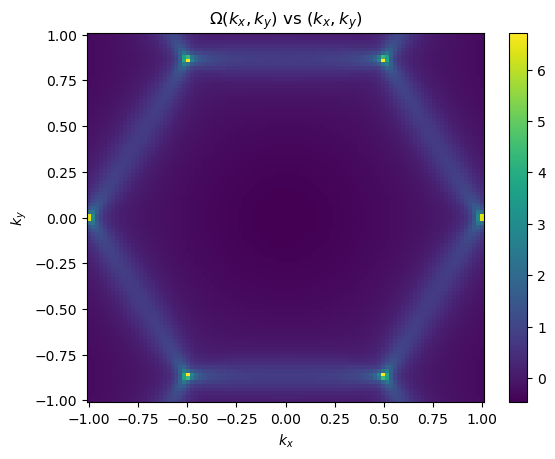

In [674]:
lambda = 1
rs = 1
kappa = 1
V = [[1, 0] [0, 0]]
shells = 5
index = 1
spacing = 10^(-4)
plot_bc(lambda, rs, kappa, V, shells, index, spacing)

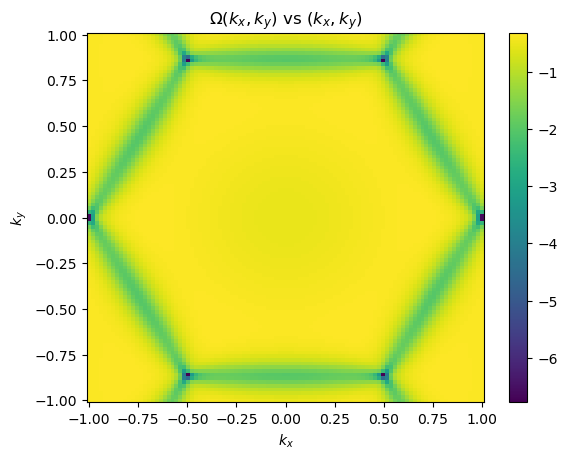

In [230]:
lambda = 1
rs = 1
kappa = 1
V = [[0, 0] [0, 1]]
shells = 5
index = 1
spacing = 10^(-4)
plot_bc(lambda, rs, kappa, V, shells, index, spacing)

It's worth noting that the above plots are slightly misleading. This is because right at mBZ $\kappa, \kappa'$ points, the Berry curvature is strongly divergent and the opposite sign than what is shown. So there are 6 Dirac cones in the mBZ that dominate the Berry curvature (why we see $C = \pm 3$).

# Chern number

In [129]:
# Compute Chern number over a single mBZ
function mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)
    num_vertices = 4
    
    mBZ_count = num_mBZ(shells)
    shell_parts = sgn_parts(shells)
    partitions = sgn_parts(shells - 1)
    part_1s = sgn_parts(1)
    dict = part_dict(shells)

    ham = zeros(ComplexF64, mBZ_count, mBZ_count)
    spinors = Array{ComplexF64}(undef, num_vertices, mBZ_count, 2)
    grounds = Array{ComplexF64}(undef, num_vertices, mBZ_count)
    # plaq_area = area(grid_spacing * sqrt(2), num_vertices)
    # area_grid_point = area(grid_spacing * sqrt(2), num_vertices)
    # plaq_area = 1
    grid_plaq_area = grid_spacing^2 * sqrt(3)/2

    g1 = kappa * sqrt(3) * [-sqrt(3)/2, 1/2]
    g2 = kappa * sqrt(3) * [0, 1]

    gi = zeros(2)
    gj = zeros(2)
    
    points = make_hex([0, 0], kappa, grid_spacing)

    bc_list = grid_bc(points, lambda, rs, kappa, V, shells, index, bc_spacing)

    return 1/(2 * pi) * grid_plaq_area * sum(bc_list)
end

mBZ_chern (generic function with 1 method)

In [97]:
lambda = 0.6
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
grid_spacing = 10^(-2)
bc_spacing = 10^(-4)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

-0.0003322360485334335

In [128]:
lambda = 1.2
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
grid_spacing = 10^(-2)
bc_spacing = 10^(-4)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

-3.929995571807986

In [130]:
lambda = 0.6
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

0.012043621541767626

In [131]:
lambda = 10
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

-1.0624074555778322

In [56]:
lambda = 1.5
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

-0.6148256516662165

In [944]:
lambda = 1.2
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

0.0005715893516616234

# Convergence of Chern number

In [47]:
function plot_chern_spacing_conv(lambda, rs, kappa, V, shells, index, grid_spacing)
    exp_list = range(1, 4, 10)
    chern_list = Array{Float64}(undef, length(exp_list))
    point = reshape(kappa * [1, 0], (1, 2))
    for j in 1:length(exp_list)
        bc_spacing = 10^(-exp_list[j])
        chern_list[j] = mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)
    end
    figure()
    xlabel(L"-\log(\text{spacing})")
    ylabel(L"C")
    title(L"C \text{ vs } -\log(\text{spacing})")
    plot(exp_list, chern_list)
    display(gcf())
end

plot_chern_spacing_conv (generic function with 1 method)

In [50]:
function plot_chern_shells_conv(lambda, rs, kappa, V, index, grid_spacing, bc_spacing)
    shell_list = 1:10
    chern_list = Array{Float64}(undef, length(shell_list))
    point = reshape(kappa * [1, 0], (1, 2))
    for j in 1:length(shell_list)
        shells = shell_list[j]
        chern_list[j] = mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)
    end
    figure()
    xlabel(L"\text{shells}")
    ylabel(L"C")
    title(L"C \text{ vs } \text{shells}")
    plot(shell_list, chern_list)
    display(gcf())
end

plot_chern_shells_conv (generic function with 1 method)

In [930]:
lambda = 1
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

1.0616306727171338e-5

In [769]:
lambda = 1
rs = 1
kappa = 1
V = [[1, 0] [0, 10^(-4)]]
shells = 5
index = 1
spacing = 10^(-4)
grid = reshape(kappa * [cos(0*pi/3), sin(0*pi/3)], (1, 2))
grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)

1-element Vector{Float64}:
 6.34010475943011e7

In [742]:
grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)

1-element Vector{Float64}:
 -0.5

In [924]:
lambda = 0.6
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
spacing = 10^(-4)
grid = reshape(kappa * [cos(0*pi/3), sin(0*pi/3)], (1, 2))
grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)

1-element Vector{Float64}:
 -0.13319808952958867

In [925]:
lambda = 1
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
spacing = 10^(-4)
grid = reshape(kappa * [cos(0*pi/3), sin(0*pi/3)], (1, 2))
grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)

1-element Vector{Float64}:
 33.552234515626495

In [926]:
lambda = 1.2
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
spacing = 10^(-4)
grid = reshape(kappa * [cos(0*pi/3), sin(0*pi/3)], (1, 2))
grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)

1-element Vector{Float64}:
 1.150478622232668

In [62]:
lambda = 0.6
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
spacing = 10^(-4)
grid = reshape(kappa * [0, sqrt(3)/2], (1, 2))
grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)

1-element Vector{Float64}:
 0.24031526562351435

In [63]:
lambda = 1.01
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
spacing = 10^(-4)
grid = reshape(kappa * [0, sqrt(3)/2], (1, 2))
grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)

1-element Vector{Float64}:
 3380.2071352465987

In [929]:
lambda = 1.2
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
index = 1
spacing = 10^(-4)
grid = reshape(kappa * [0, sqrt(3)/2], (1, 2))
grid_bc(grid, lambda, rs, kappa, V, shells, index, spacing)

1-element Vector{Float64}:
 -4.562605489473778

In [918]:
kappa = 1
k = sqrt(3)/2 * [0, 1]
lambda = 0.6
rs = 1
V = [[-1, 0] [0, -1]]
shells = 5
ham = lambda_ham(k, lambda, rs, kappa, V, shells)
gs = gauge_fix(normalize(eigvecs(ham)[:, 1]))
dict = part_dict(shells)
partitions = sgn_parts(shells)
vec1 = gs[dict[(0, 0)]]
vec2 = gs[dict[(0, -1)]]
# display(abs(vec1))
display((vec1, vec2)./vec1)

(1.0 + 2.6435160399986642e-18im, 0.9999999999990911 + 1.205178962635391e-14im)

In [919]:
kappa = 1
k = sqrt(3)/2 * [0, 1]
lambda = 1.2
rs = 1
V = [[-1, 0] [0, -1]]
shells = 5
ham = lambda_ham(k, lambda, rs, kappa, V, shells)
gs = gauge_fix(normalize(eigvecs(ham)[:, 1]))
dict = part_dict(shells)
partitions = sgn_parts(shells)
vec1 = gs[dict[(0, 0)]]
vec2 = gs[dict[(0, -1)]]
# display(abs(vec1))
display((vec1, vec2)./vec1)

(1.0 + 0.0im, -0.9999999999960482 - 3.5753172616330545e-15im)

In [908]:
kappa = 1
k = kappa * [1, 0]
lambda = 0.6
rs = 1
V = [[-1, 0] [0, -1]]
shells = 5
ham = lambda_ham(k, lambda, rs, kappa, V, shells)
gs = gauge_fix(normalize(eigvecs(ham)[:, 1]))
dict = part_dict(shells)
partitions = sgn_parts(shells)
vec1 = gs[dict[(0, 0)]]
vec2 = gs[dict[(1, 0)]]
vec3 = gs[dict[(1, -1)]]
# display(abs(vec1))
display((vec1, vec2, vec3)./vec1)

(1.0 + 0.0im, 0.9999999999984157 - 8.545291365436555e-13im, 0.9999999999984229 + 8.540116806441351e-13im)

In [911]:
kappa = 1
k = kappa * [-1, 0]
lambda = 0.6
rs = 1
V = [[-1, 0] [0, -1]]
shells = 5
ham = lambda_ham(k, lambda, rs, kappa, V, shells)
gs = gauge_fix(normalize(eigvecs(ham)[:, 1]))
dict = part_dict(shells)
partitions = sgn_parts(shells)
vec1 = gs[dict[(0, 0)]]
vec2 = gs[dict[(-1, 1)]]
vec3 = gs[dict[(-1, 0)]]
# display(abs(vec1))
display((vec1, vec2, vec3)./vec1)

(1.0 + 0.0im, 0.9999999999983962 + 8.678285462505205e-13im, 0.9999999999983933 - 8.507772719846916e-13im)

In [909]:
kappa = 1
k = kappa * [-1, 0]
lambda = 1.2
rs = 1
V = [[-1, 0] [0, -1]]
shells = 5
ham = lambda_ham(k, lambda, rs, kappa, V, shells)
gs = gauge_fix(normalize(eigvecs(ham)[:, 1]))
dict = part_dict(shells)
partitions = sgn_parts(shells)
vec1 = gs[dict[(0, 0)]]
vec3 = gs[dict[(-1, 1)]]
vec2 = gs[dict[(-1, 0)]]
# display(abs(vec1))
display((vec1, vec2, vec3)./vec1)

(0.9999999999999999 - 0.0im, -0.4999999999965377 - 0.8660254037817389im, -0.49999999999654443 + 0.8660254037817273im)

In [910]:
kappa = 1
k = kappa * [1, 0]
lambda = 1.2
rs = 1
V = [[-1, 0] [0, -1]]
shells = 5
ham = lambda_ham(k, lambda, rs, kappa, V, shells)
gs = gauge_fix(normalize(eigvecs(ham)[:, 1]))
dict = part_dict(shells)
partitions = sgn_parts(shells)
vec1 = gs[dict[(0, 0)]]
vec2 = gs[dict[(1, 0)]]
vec3 = gs[dict[(1, -1)]]
# display(abs(vec1))
display((vec1, vec2, vec3)./vec1)

(1.0 + 0.0im, -0.4999999999964876 - 0.8660254037816473im, -0.4999999999964631 + 0.8660254037817164im)

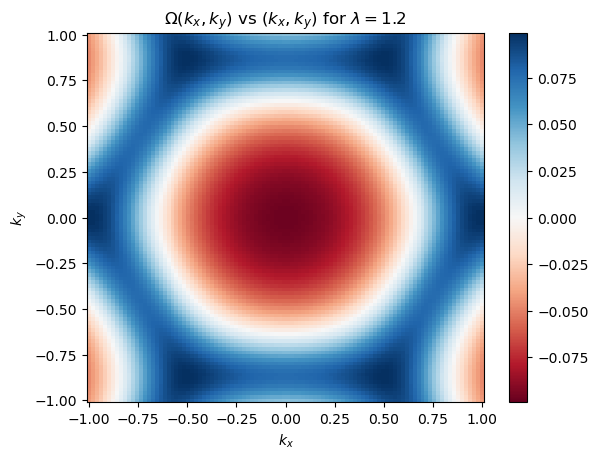

In [17]:
lambda = 0.5
rs = 1
kappa = 1
V = [[-1, 0] [0, 0]]
shells = 5
index = 1
spacing = 10^(-4)
plot_bc(lambda, rs, kappa, V, shells, index, spacing)

In [34]:
lambda = 0.5
rs = 1
kappa = 1
V = [[-1, 0] [0, 0]]
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-1)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

0.008478828566354575

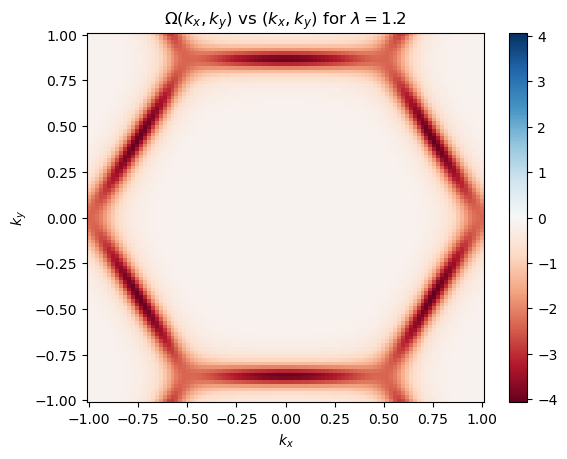

In [18]:
lambda = 0.5
rs = 1
kappa = 1
V = [[0, 0] [0, -1]]
shells = 5
index = 1
spacing = 10^(-4)
plot_bc(lambda, rs, kappa, V, shells, index, spacing)

In [35]:
lambda = 0.5
rs = 1
kappa = 1
V = [[0, 0] [0, -1]]
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-1)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

-0.9186219719295219

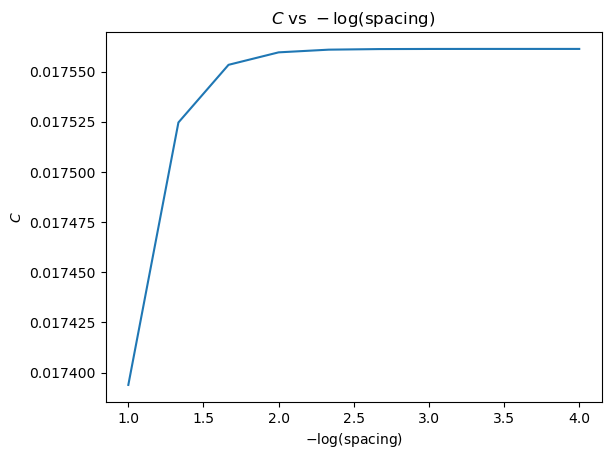

In [48]:
lambda = 1
rs = 1
kappa = 1
V = [[-2, 0] [0, -1]]
shells = 5
index = 1
grid_spacing = 10^(-1)
plot_chern_spacing_conv(lambda, rs, kappa, V, shells, index, grid_spacing)

In [42]:
lambda = 1
rs = 1
kappa = 1
V = [[-0.1, 0] [0, -1]]
shells = 5
index = 1
grid_spacing = 10^(-1)
plot_chern_spacing_conv(lambda, rs, kappa, V, shells, index, grid_spacing)

UndefVarError: UndefVarError: `k` not defined

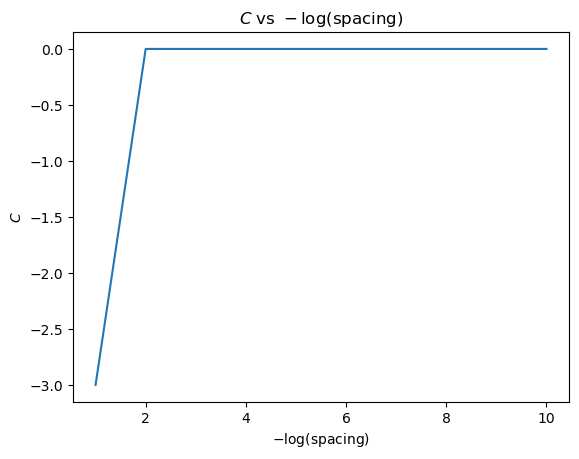

In [400]:
lambda = 1
rs = 1
kappa = 1
V = 100 * [[0, 0] [0, 1]]
shells = 5
index = 1
grid_spacing = 10^(-1)
plot_chern_spacing_conv(lambda, rs, kappa, V, shells, index, grid_spacing)

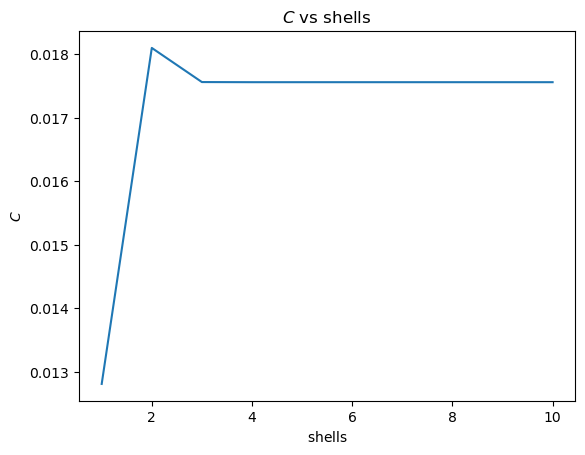

In [51]:
lambda = 1
rs = 1
kappa = 1
V = [[-2, 0] [0, -1]]
index = 1
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
plot_chern_shells_conv(lambda, rs, kappa, V, index, grid_spacing, bc_spacing)

# Chern number plots

In [51]:
function plot_chern_lambda(rs, kappa, V, shells, index, grid_spacing, bc_spacing)
    lambda_list = range(10^(-5), 5, 10)
    chern_list = Array{Float64}(undef, length(lambda_list))
    for j in 1:length(lambda_list)
        lambda = lambda_list[j]
        chern_list[j] = mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)
    end
    figure()
    xlabel(L"\lambda")
    ylabel(L"C")
    title(L"C \text{ vs } \lambda")
    plot(lambda_list, chern_list)
    display(gcf())
end

plot_chern_lambda (generic function with 1 method)

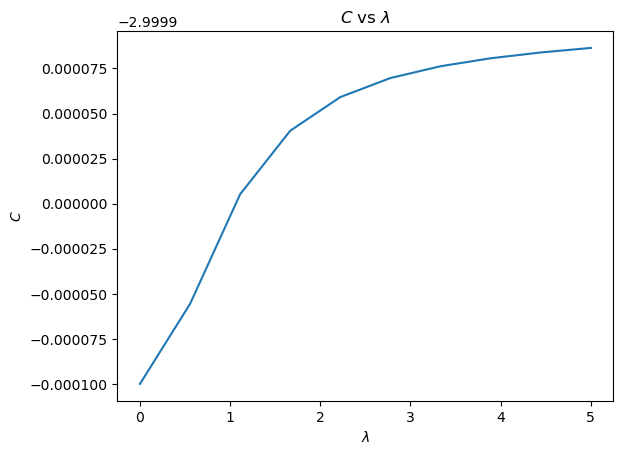

In [45]:
rs = 1
kappa = 1
V = [[1, 0] [0, 0]]
shells = 5
index = 1
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
plot_chern_lambda(rs, kappa, V, shells, index, grid_spacing, bc_spacing)

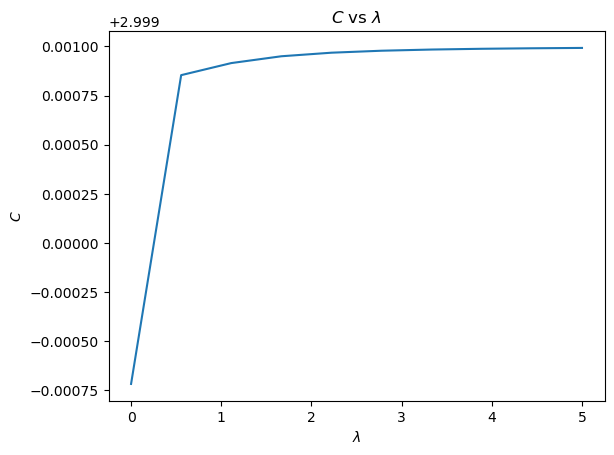

In [326]:
rs = 1
kappa = 1
V = [[0, 0] [0, 1]]
shells = 5
index = 1
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
plot_chern_lambda(rs, kappa, V, shells, index, grid_spacing, bc_spacing)

# Moire potential interpolation

In [124]:
function plot_chern_interp_v2(lambda, rs, kappa, shells, index, grid_spacing, bc_spacing)
    v_list = range(-2, 2, 6)
    chern_list = Array{Float64}(undef, length(v_list))
    for j in 1:length(v_list)
        V = [[1/2 * (v_list[j] - 1), 0] [0, -1/2 * (v_list[j] + 1)]]
        chern_list[j] = mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)
    end
    figure()
    xlabel(L"v")
    ylabel(L"C")
    title(L"C \text{ vs } v")
    plot(v_list, chern_list)
    display(gcf())
end

plot_chern_interp_v2 (generic function with 1 method)

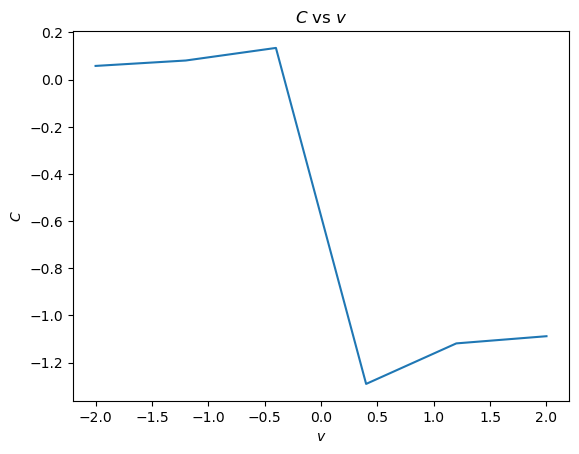

In [125]:
lambda = 1
rs = 1
kappa = 1
shells = 5
index = 1
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
plot_chern_interp_v2(lambda, rs, kappa, shells, index, grid_spacing, bc_spacing)

In [36]:
function plot_chern_interp(lambda, rs, kappa, shells, index, grid_spacing, bc_spacing)
    tuner_list = range(-2, 0, 20)
    chern_list = Array{Float64}(undef, length(tuner_list))
    for j in 1:length(tuner_list)
        V = [[tuner_list[j], 0] [0, -1]]
        chern_list[j] = mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)
    end
    figure()
    xlabel(L"v_1")
    ylabel(L"C")
    title(L"C \text{ vs } v_1")
    plot(tuner_list, chern_list)
    display(gcf())
end

plot_chern_interp (generic function with 2 methods)

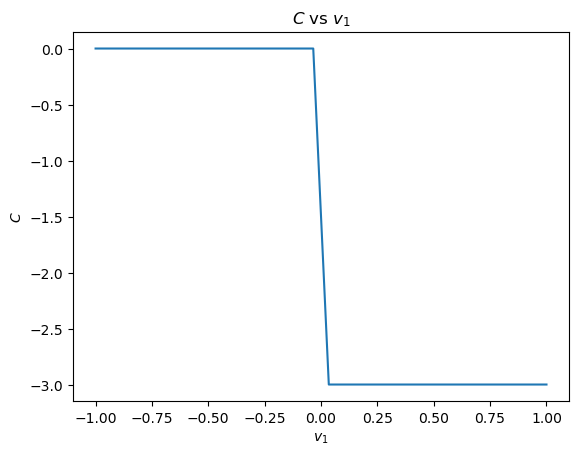

In [15]:
lambda = 1
rs = 1
kappa = 1
shells = 5
index = 1
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
plot_chern_interp(lambda, rs, kappa, shells, index, grid_spacing, bc_spacing)

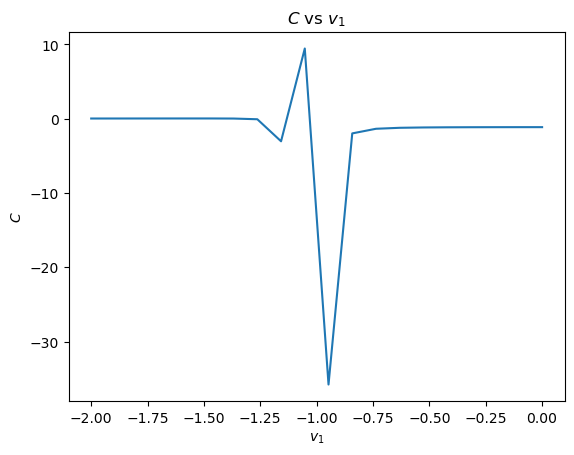

In [106]:
lambda = 1
rs = 1
kappa = 1
shells = 5
index = 1
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
plot_chern_interp(lambda, rs, kappa, shells, index, grid_spacing, bc_spacing)

In [107]:
lambda = 1
rs = 1
kappa = 1
V = [[2, 0] [0, -1]]
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-1)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

-1.190010170122329

In [109]:
lambda = 1
rs = 1
kappa = 1
V = [[2, 0] [0, -1]]
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-2)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

-0.9828334346804634

In [110]:
lambda = 1
rs = 1
kappa = 1
V = [[-2, 0] [0, 1]]
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-1)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

0.04237841887835637

In [111]:
lambda = 1
rs = 1
kappa = 1
V = [[-2, 0] [0, 1]]
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-2)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

-0.0040558250366715546

In [39]:
lambda = 1
rs = 1
kappa = 1
V = [[-0.1, 0] [0, -1]]
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-1)
mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)

-0.654550111980308

# Band gaps

In [150]:
function plot_gap_shells(q, lambda, rs, kappa, V)
    shell_list = 1:30
    gaps = Array{Float64}(undef, length(shell_list))
    for i in 1:length(shell_list)
        shells = shell_list[i]
        ham = lambda_ham(q, lambda, rs, kappa, V, shells)
        vals = eigvals(Hermitian(ham))
        gaps[i] = log10(abs.(vals[1] - vals[2]))
    end
    figure()
    xlabel(L"\text{shells}")
    ylabel(L"\log|\epsilon_0 - \epsilon_1|")
    title(L"\log|\epsilon_0 - \epsilon_1| \text{ vs } \text{shells}")
    plot(shell_list, gaps)
    display(gcf())
end

plot_gap_shells (generic function with 1 method)

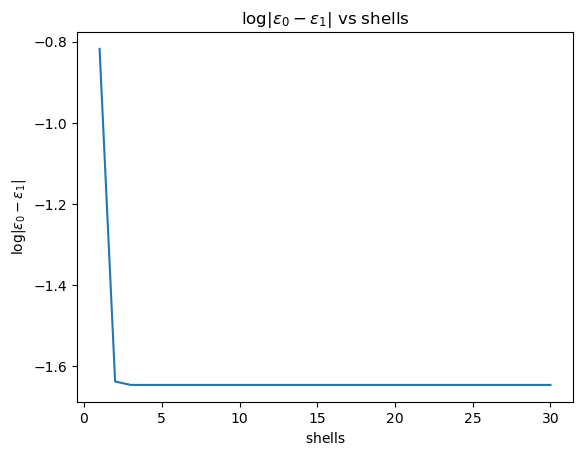

In [923]:
q = sqrt(3)/2 * [0, 1]
lambda = 1
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
plot_gap_shells(q, lambda, rs, kappa, V)

In [921]:
function plot_gap_lambda(q, rs, kappa, V, shells)
    lambda_list = range(0.5, 1.5, 10^3)
    gaps = Array{Float64}(undef, length(lambda_list), 2)
    for i in 1:length(lambda_list)
        lambda = lambda_list[i]
        q1 = kappa * [1, 0]
        ham = lambda_ham(q1, lambda, rs, kappa, V, shells)
        vals = eigvals(Hermitian(ham))
        gaps[i, 1] = log10(vals[2] - vals[1])

        q2 = sqrt(3)/2 * [0, 1]
        ham = lambda_ham(q2, lambda, rs, kappa, V, shells)
        vals = eigvals(Hermitian(ham))
        gaps[i, 2] = log10(vals[2] - vals[1])
    end
    figure()
    xlabel(L"\lambda")
    ylabel(L"\log|\epsilon_0 - \epsilon_1|")
    title(L"\log|\epsilon_0 - \epsilon_1| \text{ vs } \lambda")
    plot(lambda_list, gaps[:, 1], label = L"C_3")
    plot(lambda_list, gaps[:, 2], label = L"C_2")
    legend()
    display(gcf())
end

plot_gap_lambda (generic function with 1 method)

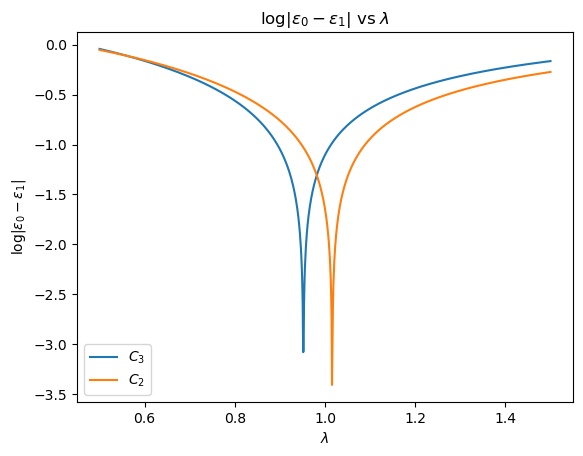

In [922]:
q = sqrt(3)/2 * [0, 1]
rs = 1
kappa = 1
V = [[-1, 0] [0, -1]]
shells = 5
plot_gap_lambda(q, rs, kappa, V, shells)

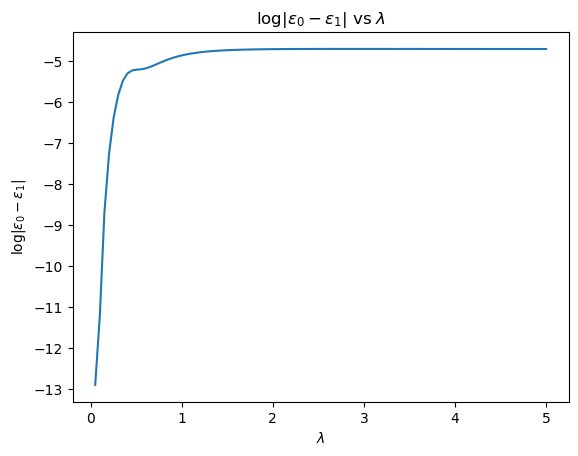

In [330]:
q = kappa * [cos(0*pi/3), sin(0*pi/3)]
rs = 1
kappa = 1
V = 10 * [[0, 0] [0, 1]]
shells = 5
plot_gap_lambda(q, rs, kappa, V, shells)

In [317]:
function plot_gap_contour(lambda, rs, kappa, V, shells)
    n_pts = 10^2

    k_list = range(-kappa, kappa, n_pts)
    xgrid, ygrid = meshgrid(k_list, k_list)

    # shift = 10^(-3)
    # kx_list = range(kappa - shift, kappa + shift, n_pts)
    # ky_list = shift * range(-1, 1, n_pts)
    # xgrid, ygrid = meshgrid(kx_list, ky_list)

    gaps = Array{Float64}(undef, n_pts, n_pts)

    for i in 1:n_pts
        for j in 1:n_pts
            kx = xgrid[i, j]
            ky = ygrid[i, j]
            ham = lambda_ham([kx, ky], lambda, rs, kappa, V, shells)
            vals = eigvals(Hermitian(ham))
            gaps[i, j] = log10(abs(vals[1] - vals[2]))
        end
    end
    fig, ax = plt.subplots()
    CS = ax.contour(xgrid, ygrid, gaps, levels=10)

    ax.clabel(CS, fontsize=10)

    ax.set_title(L"\log|\epsilon_0 - \epsilon_1| \text{ vs } (k_x, k_y)")
    ax.set_xlabel(L"k_x")
    ax.set_ylabel(L"k_y")
    fig
end

plot_gap_contour (generic function with 1 method)

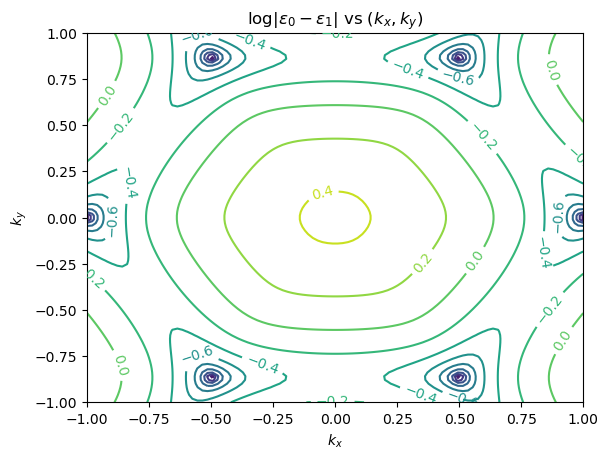

In [318]:
lambda = 1
rs = 1
kappa = 1
V = [[1, 0] [0, 0]]
shells = 5
plot_gap_contour(lambda, rs, kappa, V, shells)

In [409]:
PyPlot.close("all")

# Band crossings with varied potentials

In [543]:
function plot_gap_v1(q, lambda, rs, kappa, v2, shells)
    v1_list = range(-3, 3, 10^2)
    gaps = Array{Float64}(undef, length(v1_list))
    for i in 1:length(v1_list)
        V = [[v1_list[i], 0] [0, v2]]
        ham = lambda_ham(q, lambda, rs, kappa, V, shells)
        vals = eigvals(Hermitian(ham))
        gaps[i] = log10(vals[2] - vals[1])
    end
    figure()
    xlabel(L"v_1")
    ylabel(L"\log(\epsilon_1 - \epsilon_0)")
    title(L"\log(\epsilon_1 - \epsilon_0) \text{ vs } v_1")
    plot(v1_list, gaps)
    display(gcf())
end

plot_gap_v1 (generic function with 1 method)

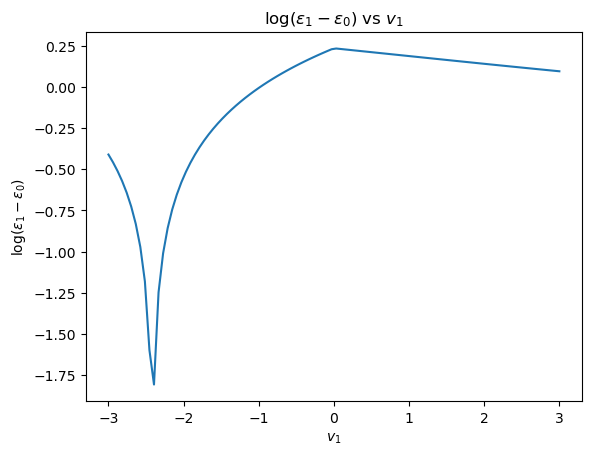

In [544]:
kappa = 1
q = kappa * [cos(0*pi/3), sin(0*pi/3)]
lambda = 1
rs = 1
v2 = -2
shells = 5
plot_gap_v1(q, lambda, rs, kappa, v2, shells)

In [788]:
function plot_gap_v2(q, lambda, rs, kappa, v1, shells)
    v2_list = range(-2, 2, 10^3)
    gaps = Array{Float64}(undef, length(v2_list))
    for i in 1:length(v2_list)
        V = [[v1, 0] [0, v2_list[i]]]
        ham = lambda_ham(q, lambda, rs, kappa, V, shells)
        vals = eigvals(Hermitian(ham))
        gaps[i] = log10(vals[2] - vals[1])
    end
    figure()
    xlabel(L"v_2")
    ylabel(L"\log(\epsilon_1 - \epsilon_0)")
    title(L"\log(\epsilon_1 - \epsilon_0) \text{ vs } v_2")
    plot(v2_list, gaps)
    display(gcf())
end

plot_gap_v2 (generic function with 1 method)

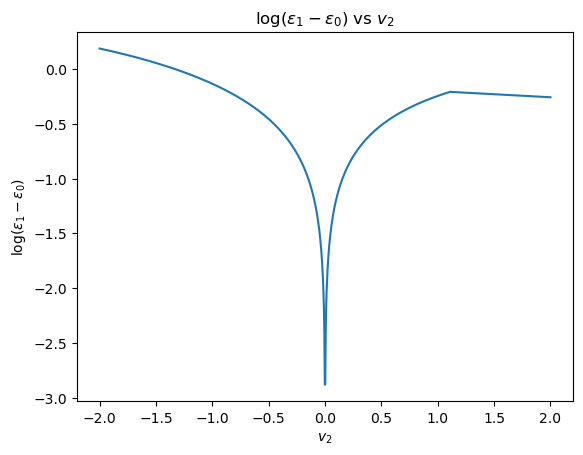

In [793]:
kappa = 1
q = kappa * [1, 0]
lambda = 1
rs = 1
v1 = 1
shells = 5
plot_gap_v2(q, lambda, rs, kappa, v1, shells)

# Chern number varying potentials

In [786]:
function plot_chern_v2(lambda, rs, kappa, v1, shells, grid_spacing, bc_spacing)
    v2_list = range(-2, 2, 10)
    cherns = Array{Float64}(undef, length(v2_list))
    for i in 1:length(v2_list)
        V = [[v1, 0] [0, v2_list[i]]]
        cherns[i] = mBZ_chern(lambda, rs, kappa, V, shells, 1, grid_spacing, bc_spacing)
    end
    figure()
    xlabel(L"v_2")
    ylabel(L"C")
    title(L"C \text{ vs } v_2")
    plot(v2_list, cherns)
    display(gcf())
end

plot_chern_v2 (generic function with 2 methods)

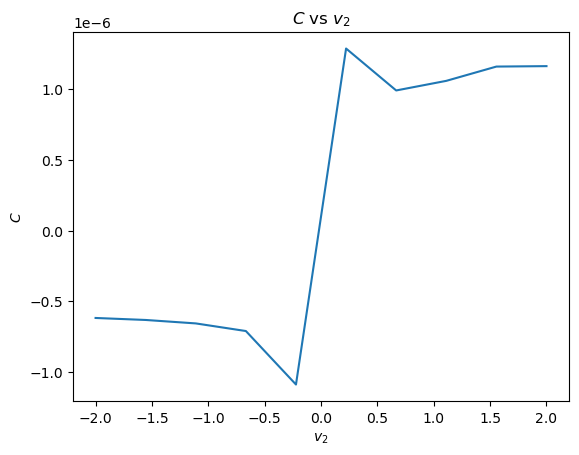

In [787]:
kappa = 1
lambda = 1
rs = 1
v1 = 1
shells = 5
grid_spacing = 10^(-1)
bc_spacing = 10^(-4)
plot_chern_v2(lambda, rs, kappa, v1, shells, grid_spacing, bc_spacing)

# Further considerations

There are a few things that I would just like to verify now that we believe that we have proper quantization of the Chern number. The plaquette area is correct. 
- See if we can actually see the desired phase transitions.
- Ensure that the quantization improves with the discretization of the mBZ grid.

### $C = 0 \leftrightarrow C = -1$ transition

Obtained at $V = (-1, -1), \lambda = 1$.

In [137]:
lambda = 1
rs = 1
kappa = 1
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-1)

V = [[-1, 0] [0, -0.6]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

V = [[-1, 0] [0, -1.2]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

0.07659739316788691

-1.3531681258964796

In [139]:
lambda = 1
rs = 1
kappa = 1
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-2)

V = [[-1, 0] [0, -0.6]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

V = [[-1, 0] [0, -1.2]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

-0.009631412552658406

-0.9664529698690454

Much better quantization

### $C = -1 \leftrightarrow C = 1$ transition

In [141]:
lambda = 1
rs = 1
kappa = 1
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-1)

V = [[1, 0] [0, -0.6]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

V = [[1, 0] [0, 0.6]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

-1.2562699937821689

1.7174890090346293

In [142]:
lambda = 1
rs = 1
kappa = 1
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-2)

V = [[1, 0] [0, -0.6]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

V = [[1, 0] [0, 0.6]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

-0.9774246558777615

0.9321579759935593

Much better quantization

### $C = 0 \leftrightarrow C = 1$ transition

In [143]:
lambda = 1
rs = 1
kappa = 1
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-1)

V = [[1, 0] [0, 0.6]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

V = [[-1, 0] [0, 0.6]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

1.7174890090346293

0.09357433572532918

In [144]:
lambda = 1
rs = 1
kappa = 1
shells = 5
index = 1
bc_spacing = 10^(-4)
grid_spacing = 10^(-2)

V = [[1, 0] [0, 0.6]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

V = [[-1, 0] [0, 0.6]]
display(mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing))

0.9321579759935593

-0.008727206675660938

In [147]:
function plot_chern_interp(lambda, rs, kappa, shells, index, grid_spacing, bc_spacing)
    tuner_list = range(-2, 2, 50)
    chern_list = Array{Float64}(undef, length(tuner_list))
    for j in 1:length(tuner_list)
        V = [[tuner_list[j], 0] [0, -1]]
        chern_list[j] = mBZ_chern(lambda, rs, kappa, V, shells, index, grid_spacing, bc_spacing)
    end
    figure()
    xlabel(L"v_1")
    ylabel(L"C")
    title(L"C \text{ vs } v_1")
    plot(tuner_list, chern_list)
    display(gcf())
end

plot_chern_interp (generic function with 2 methods)

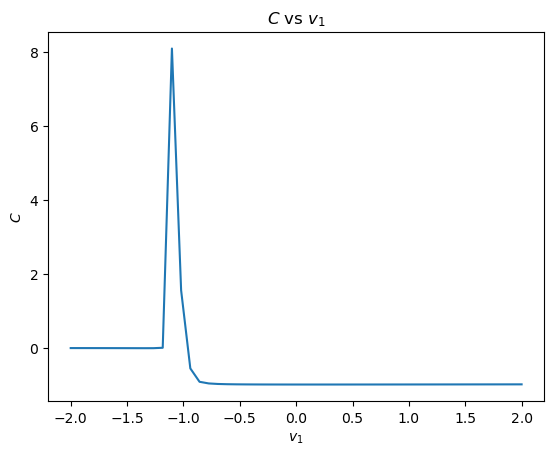

In [148]:
lambda = 1
rs = 1
kappa = 1
shells = 5
index = 1
grid_spacing = 10^(-2)
bc_spacing = 10^(-4)
plot_chern_interp(lambda, rs, kappa, shells, index, grid_spacing, bc_spacing)